In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
dataset_url = "https://universe.roboflow.com/ds/Ygn4yZMRGH?key=WU1qLsXFhO"
import requests
import zipfile
def download_dataset(url, dest_folder):
    response = requests.get(url, stream=True)
    zip_path = os.path.join(dest_folder, "dataset.zip")
    with open(zip_path, "wb") as file:
        file.write(response.content)

    # Unzipping the dataset
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dest_folder)
    print(f"Dataset downloaded and extracted to {dest_folder}")

In [ ]:
dataset_folder = os.path.join(HOME, "railway_human_dataset")
os.makedirs(dataset_folder, exist_ok=True)

In [ ]:
download_dataset(dataset_url, dataset_folder)

Dataset downloaded and extracted to /content/railway_human_dataset


In [ ]:
data_yaml_path = os.path.join(HOME, 'railway_human_dataset', 'data.yaml')

In [ ]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 124MB/s] 


In [ ]:
dataset_path = os.path.join(HOME, "railway_human_dataset")

In [ ]:
model.train(data=data_yaml_path, epochs=50, imgsz=640, batch=16, verbose=True, save=True)

New https://pypi.org/project/ultralytics/8.3.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/railway_human_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/railway_human_dataset/train/labels... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 368.60it/s]


train: New cache created: /content/railway_human_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/railway_human_dataset/valid/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 3799.19it/s]

val: New cache created: /content/railway_human_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.912      3.486      1.695         38        640: 100%|██████████| 5/5 [03:24<00:00, 40.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.33s/it]

                   all          7         26      0.708      0.654      0.605      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.505       1.88      1.238         51        640: 100%|██████████| 5/5 [02:59<00:00, 35.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all          7         26      0.399      0.769      0.389       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.368      1.487      1.112         38        640: 100%|██████████| 5/5 [02:52<00:00, 34.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.54s/it]

                   all          7         26      0.755      0.615        0.7      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.315      1.383      1.139         23        640: 100%|██████████| 5/5 [02:52<00:00, 34.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all          7         26      0.721      0.497        0.5      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G       1.28      1.216      1.086         49        640: 100%|██████████| 5/5 [02:55<00:00, 35.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all          7         26      0.757        0.5      0.551      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.183      1.099      1.087         37        640: 100%|██████████| 5/5 [02:48<00:00, 33.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]

                   all          7         26      0.869       0.51      0.547      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.215        1.1      1.119         30        640: 100%|██████████| 5/5 [02:50<00:00, 34.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.29s/it]

                   all          7         26       0.51      0.385       0.41       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.193      1.139      1.115         35        640: 100%|██████████| 5/5 [02:51<00:00, 34.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all          7         26      0.541      0.499      0.443      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G       1.28       1.15      1.165         39        640: 100%|██████████| 5/5 [02:49<00:00, 33.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]

                   all          7         26      0.354      0.231      0.157     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.164      1.082      1.085         37        640: 100%|██████████| 5/5 [02:47<00:00, 33.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.35s/it]

                   all          7         26      0.531      0.192       0.22     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.263      1.064      1.173         37        640: 100%|██████████| 5/5 [02:48<00:00, 33.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]

                   all          7         26      0.437      0.231       0.17     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.236     0.9444      1.083         56        640: 100%|██████████| 5/5 [02:49<00:00, 33.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all          7         26      0.844      0.269      0.403      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.085     0.9609      1.089         24        640: 100%|██████████| 5/5 [02:51<00:00, 34.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.20s/it]

                   all          7         26      0.481      0.423      0.357      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.161     0.9638      1.141         51        640: 100%|██████████| 5/5 [02:52<00:00, 34.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.26s/it]

                   all          7         26      0.545      0.461      0.472      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.086     0.9394      1.091         37        640: 100%|██████████| 5/5 [02:46<00:00, 33.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]

                   all          7         26      0.612      0.692      0.661      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.078     0.9699      1.074         45        640: 100%|██████████| 5/5 [02:47<00:00, 33.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.30s/it]

                   all          7         26       0.72      0.577      0.649      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.129     0.9879      1.078         32        640: 100%|██████████| 5/5 [02:47<00:00, 33.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all          7         26       0.74      0.577      0.581      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.085     0.8745      1.051         33        640: 100%|██████████| 5/5 [02:50<00:00, 34.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all          7         26      0.754        0.5      0.562      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.036     0.8148      1.041         31        640: 100%|██████████| 5/5 [02:48<00:00, 33.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.21s/it]

                   all          7         26      0.651      0.575      0.559      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.004      0.823       1.09         33        640: 100%|██████████| 5/5 [02:46<00:00, 33.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.76s/it]

                   all          7         26      0.537      0.491      0.451      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.069     0.8766      1.077         31        640: 100%|██████████| 5/5 [02:52<00:00, 34.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]

                   all          7         26      0.749      0.459      0.456      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.9949     0.7862      1.044         56        640: 100%|██████████| 5/5 [02:48<00:00, 33.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.93s/it]

                   all          7         26      0.719      0.493      0.495      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.9785     0.8508      1.062         31        640: 100%|██████████| 5/5 [02:51<00:00, 34.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.29s/it]

                   all          7         26      0.659        0.5      0.598      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.9916     0.7945       1.06         41        640: 100%|██████████| 5/5 [02:52<00:00, 34.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]

                   all          7         26       0.61        0.5      0.554      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      0.902     0.7266     0.9884         46        640: 100%|██████████| 5/5 [02:48<00:00, 33.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]

                   all          7         26      0.694        0.5      0.537      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      0.972     0.7884      1.074         38        640: 100%|██████████| 5/5 [02:48<00:00, 33.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.29s/it]

                   all          7         26      0.533      0.614      0.512      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.9582     0.7472      1.039         33        640: 100%|██████████| 5/5 [02:48<00:00, 33.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all          7         26      0.689      0.512      0.595      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.9293     0.7182      1.003         45        640: 100%|██████████| 5/5 [02:46<00:00, 33.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.18s/it]

                   all          7         26      0.625      0.346      0.454      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      0.928     0.7161      1.038         36        640: 100%|██████████| 5/5 [02:45<00:00, 33.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all          7         26      0.597      0.269       0.32      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.8751     0.7363      1.028         33        640: 100%|██████████| 5/5 [02:49<00:00, 33.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.71s/it]

                   all          7         26      0.351      0.396      0.319      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9565      0.732      1.061         29        640: 100%|██████████| 5/5 [02:47<00:00, 33.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]

                   all          7         26      0.471      0.462      0.393      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8923     0.6987      1.035         35        640: 100%|██████████| 5/5 [02:48<00:00, 33.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]

                   all          7         26      0.699      0.577      0.622      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.9046     0.6797      1.014         42        640: 100%|██████████| 5/5 [02:49<00:00, 33.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.26s/it]

                   all          7         26      0.844      0.654       0.68      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.8226     0.6609     0.9783         36        640: 100%|██████████| 5/5 [02:52<00:00, 34.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]

                   all          7         26      0.748      0.684      0.665      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.8463     0.6507     0.9941         34        640: 100%|██████████| 5/5 [02:47<00:00, 33.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all          7         26      0.894      0.651      0.719      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.8056     0.6426     0.9673         47        640: 100%|██████████| 5/5 [02:47<00:00, 33.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.15s/it]

                   all          7         26      0.778      0.692      0.703      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.7298     0.5901     0.9526         32        640: 100%|██████████| 5/5 [02:47<00:00, 33.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]

                   all          7         26      0.806      0.692      0.727      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.7543     0.5991     0.9854         40        640: 100%|██████████| 5/5 [02:49<00:00, 33.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.93s/it]

                   all          7         26      0.818      0.691      0.727      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.7765     0.6061     0.9548         27        640: 100%|██████████| 5/5 [02:49<00:00, 33.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.31s/it]

                   all          7         26      0.788      0.692      0.741      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.7136     0.5559     0.9538         44        640: 100%|██████████| 5/5 [02:50<00:00, 34.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.23s/it]

                   all          7         26      0.817      0.686      0.727      0.335


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.6256     0.5074     0.9057         21        640: 100%|██████████| 5/5 [02:50<00:00, 34.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]

                   all          7         26      0.808      0.649       0.71      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.6248     0.4855     0.9275         23        640: 100%|██████████| 5/5 [02:50<00:00, 34.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]

                   all          7         26      0.873      0.577      0.666      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.636     0.5065     0.9238         35        640: 100%|██████████| 5/5 [02:48<00:00, 33.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]

                   all          7         26      0.924      0.577      0.639      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.5985     0.4819     0.9046         31        640: 100%|██████████| 5/5 [02:48<00:00, 33.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]

                   all          7         26      0.826      0.577      0.614      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5813     0.4633     0.8866         31        640: 100%|██████████| 5/5 [02:54<00:00, 34.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all          7         26       0.82      0.577      0.614      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5823     0.4575     0.9044         26        640: 100%|██████████| 5/5 [02:49<00:00, 33.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.21s/it]

                   all          7         26      0.818      0.577      0.628      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      0.537     0.4337      0.892         19        640: 100%|██████████| 5/5 [02:50<00:00, 34.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.33s/it]

                   all          7         26      0.747      0.577       0.62      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.5461     0.4299     0.8786         26        640: 100%|██████████| 5/5 [02:49<00:00, 33.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]

                   all          7         26      0.867      0.538      0.637      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.5185     0.4336     0.8848         31        640: 100%|██████████| 5/5 [02:49<00:00, 33.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.41s/it]

                   all          7         26      0.788      0.572      0.652      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5802     0.4487     0.8849         16        640: 100%|██████████| 5/5 [02:53<00:00, 34.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.30s/it]

                   all          7         26      0.788       0.57      0.652      0.357



50 epochs completed in 2.462 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]


                   all          7         26      0.894       0.65      0.719      0.368
Speed: 2.4ms preprocess, 808.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78fa5d6cdbd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
results=model.val(data=data_yaml_path, epochs=50, imgsz=640, batch=16, verbose=True, save=True)

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/railway_human_dataset/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.04s/it]


                   all          7         26      0.894       0.65      0.719      0.368
Speed: 3.6ms preprocess, 701.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train4


In [ ]:
# Use the following to access individual metrics:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78fa610a7700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
results = model.predict(
    source=os.path.join(HOME, 'railway_human_dataset', 'test', 'images'),  # Adjust path to test images
    conf=0.5,
    iou=0.45,# Confidence threshold
    save=True  # Save predictions
)


image 1/4 /content/railway_human_dataset/test/images/crossing_people14_jpeg.rf.85dec850bf49f449c71a356da5556ed4.jpg: 640x640 3 Humans, 670.9ms
image 2/4 /content/railway_human_dataset/test/images/crossing_people21_jpeg.rf.0557a1d73d5d40ea89b5918bc92182ca.jpg: 640x640 (no detections), 632.9ms
image 3/4 /content/railway_human_dataset/test/images/crossing_people26_jpg.rf.a1e2cdf659c3e6ce521d2c8cc900acb2.jpg: 640x640 1 Human, 965.9ms
image 4/4 /content/railway_human_dataset/test/images/crossing_people7_jpg.rf.9a87cc43489a76482abe910e0f8cdbfa.jpg: 640x640 1 Human, 1302.1ms
Speed: 7.9ms preprocess, 892.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train5


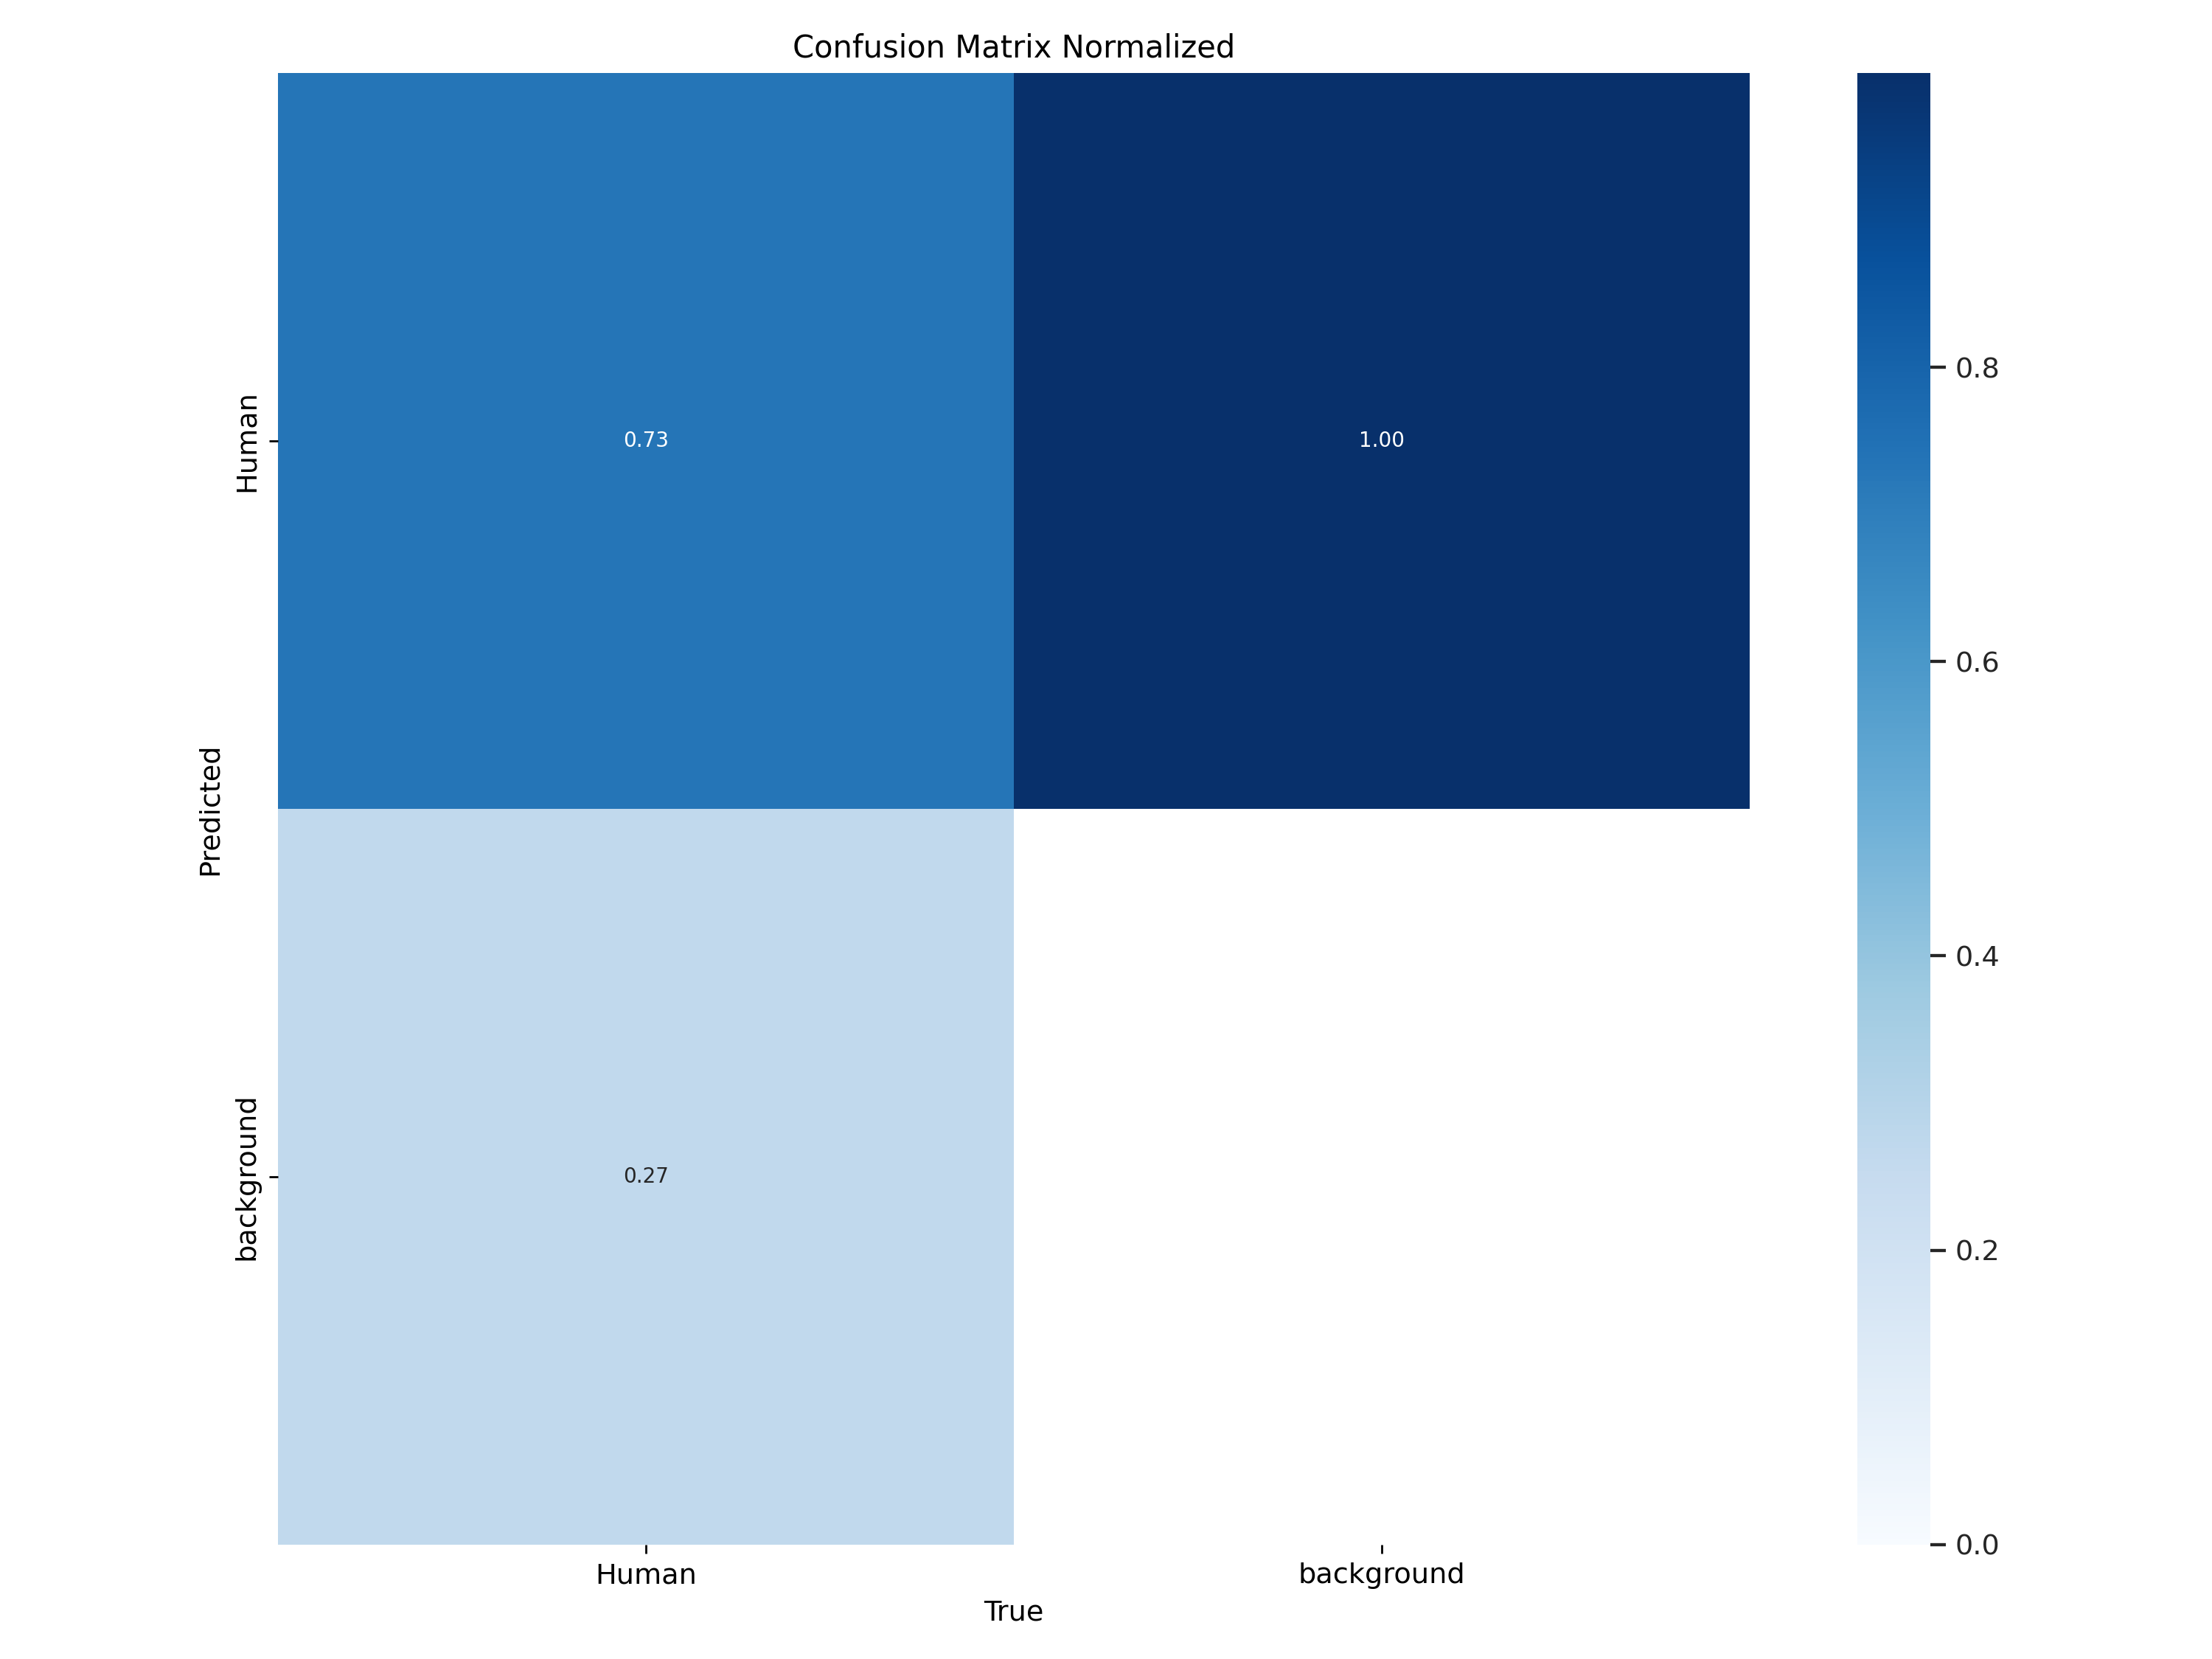

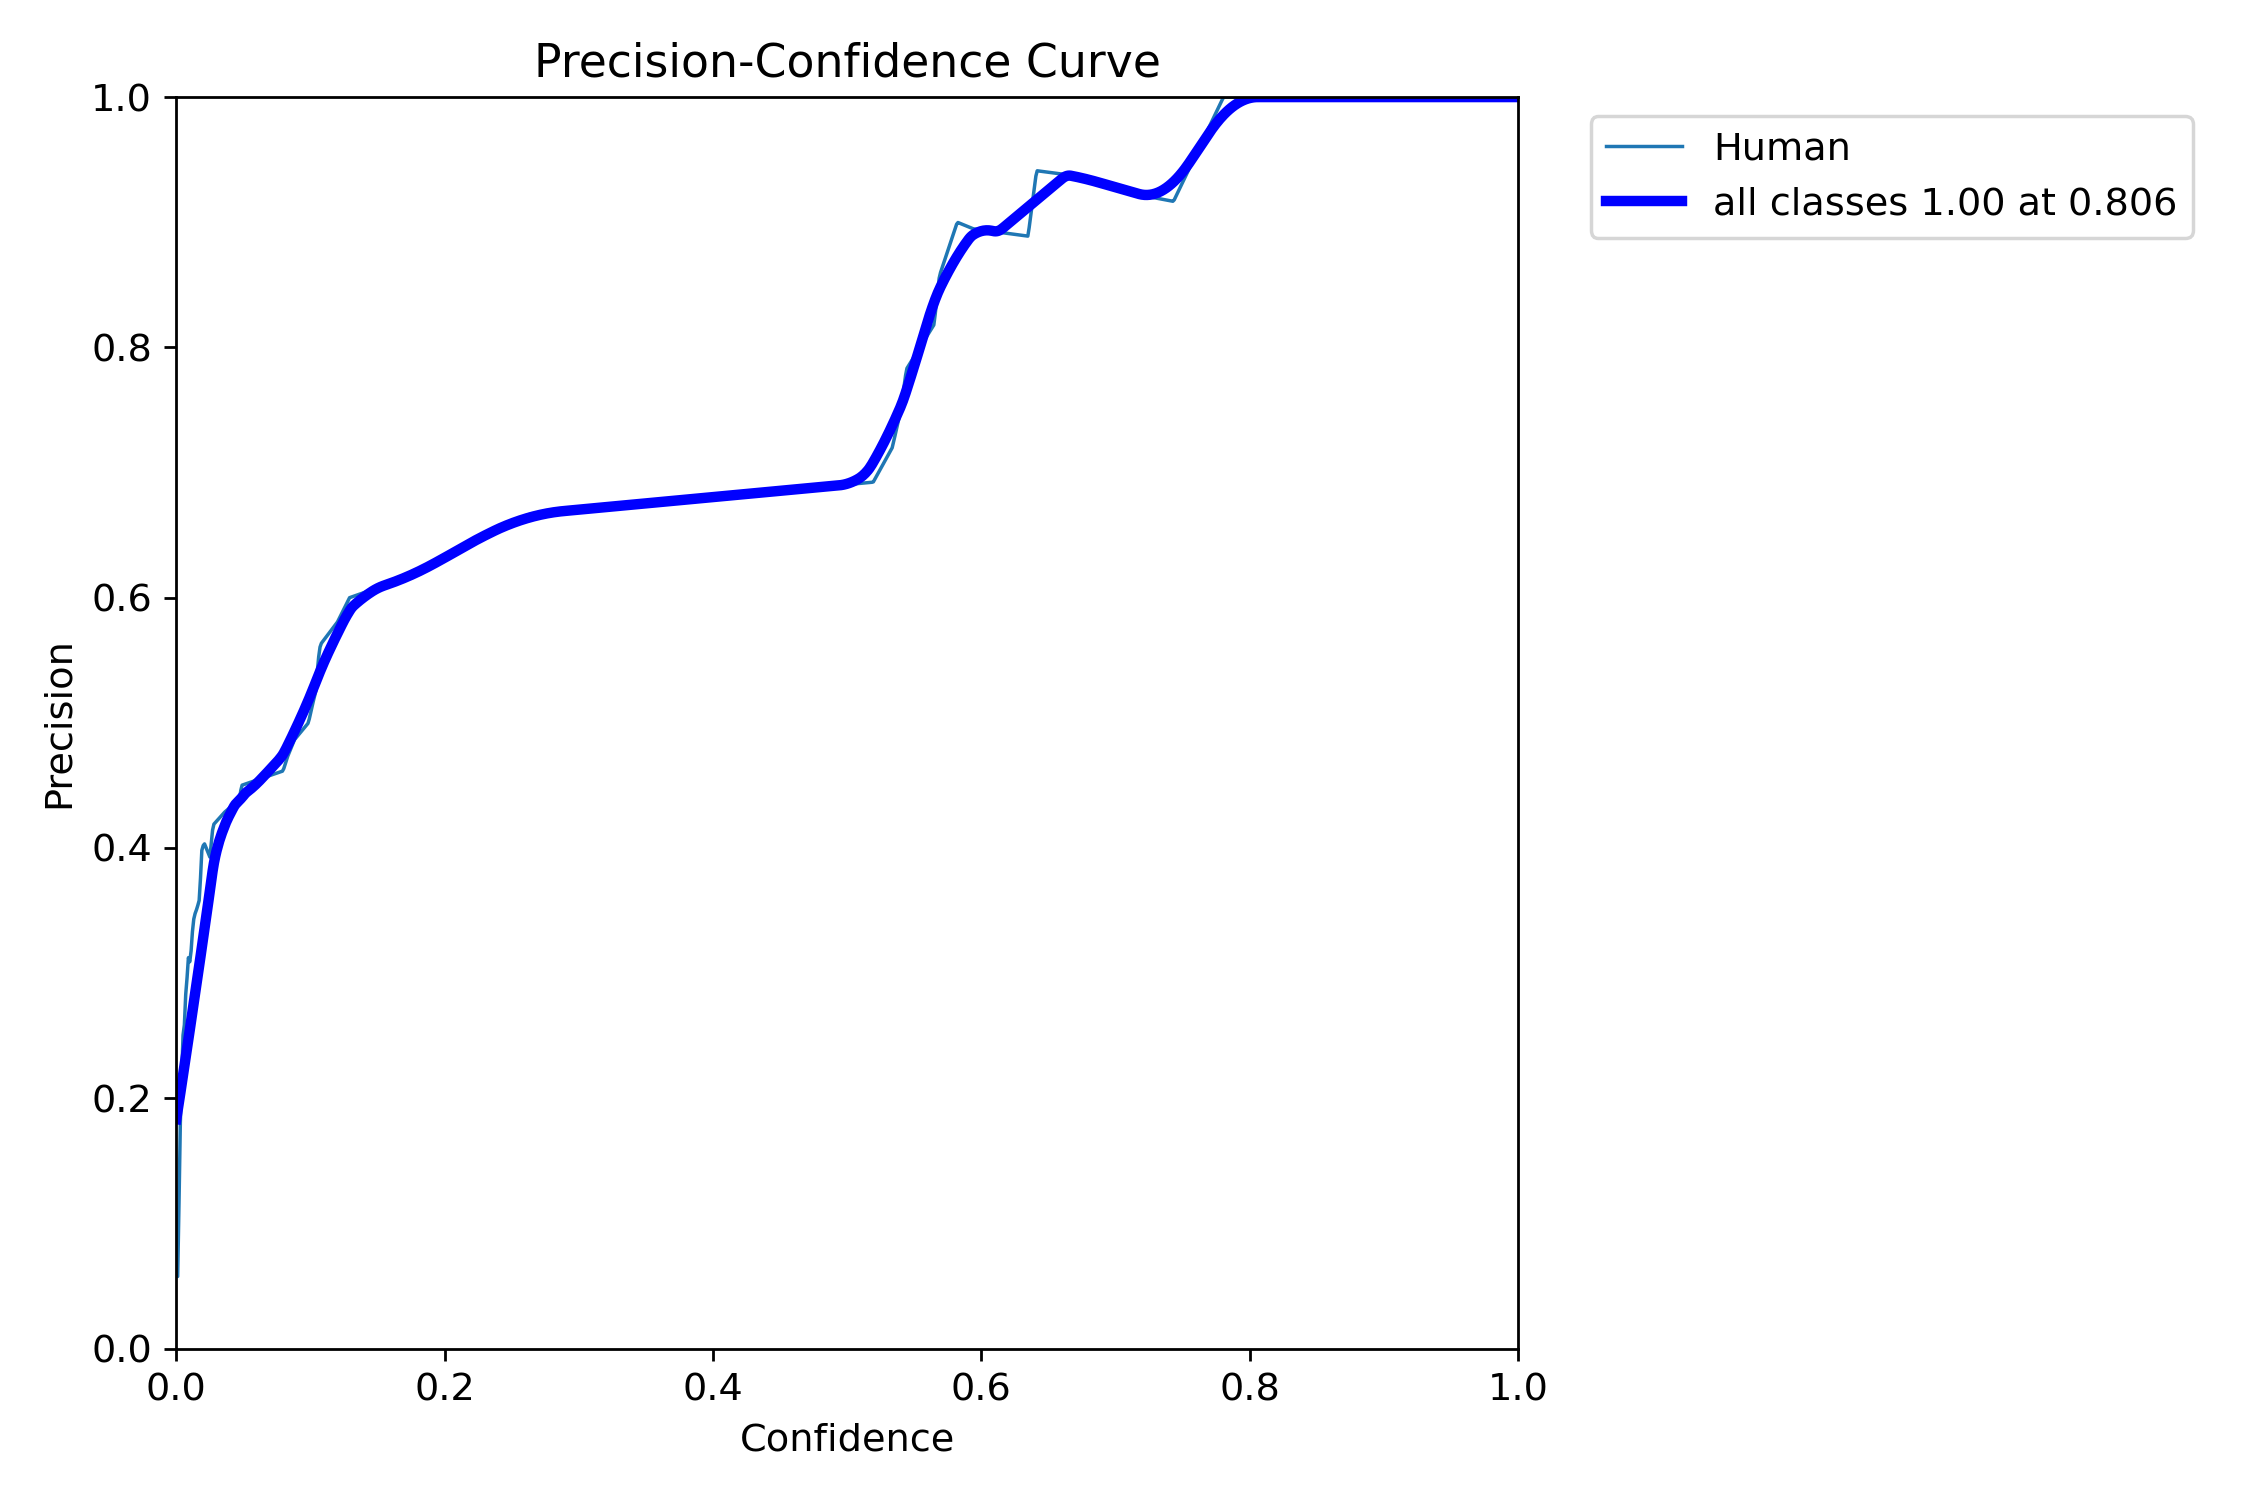

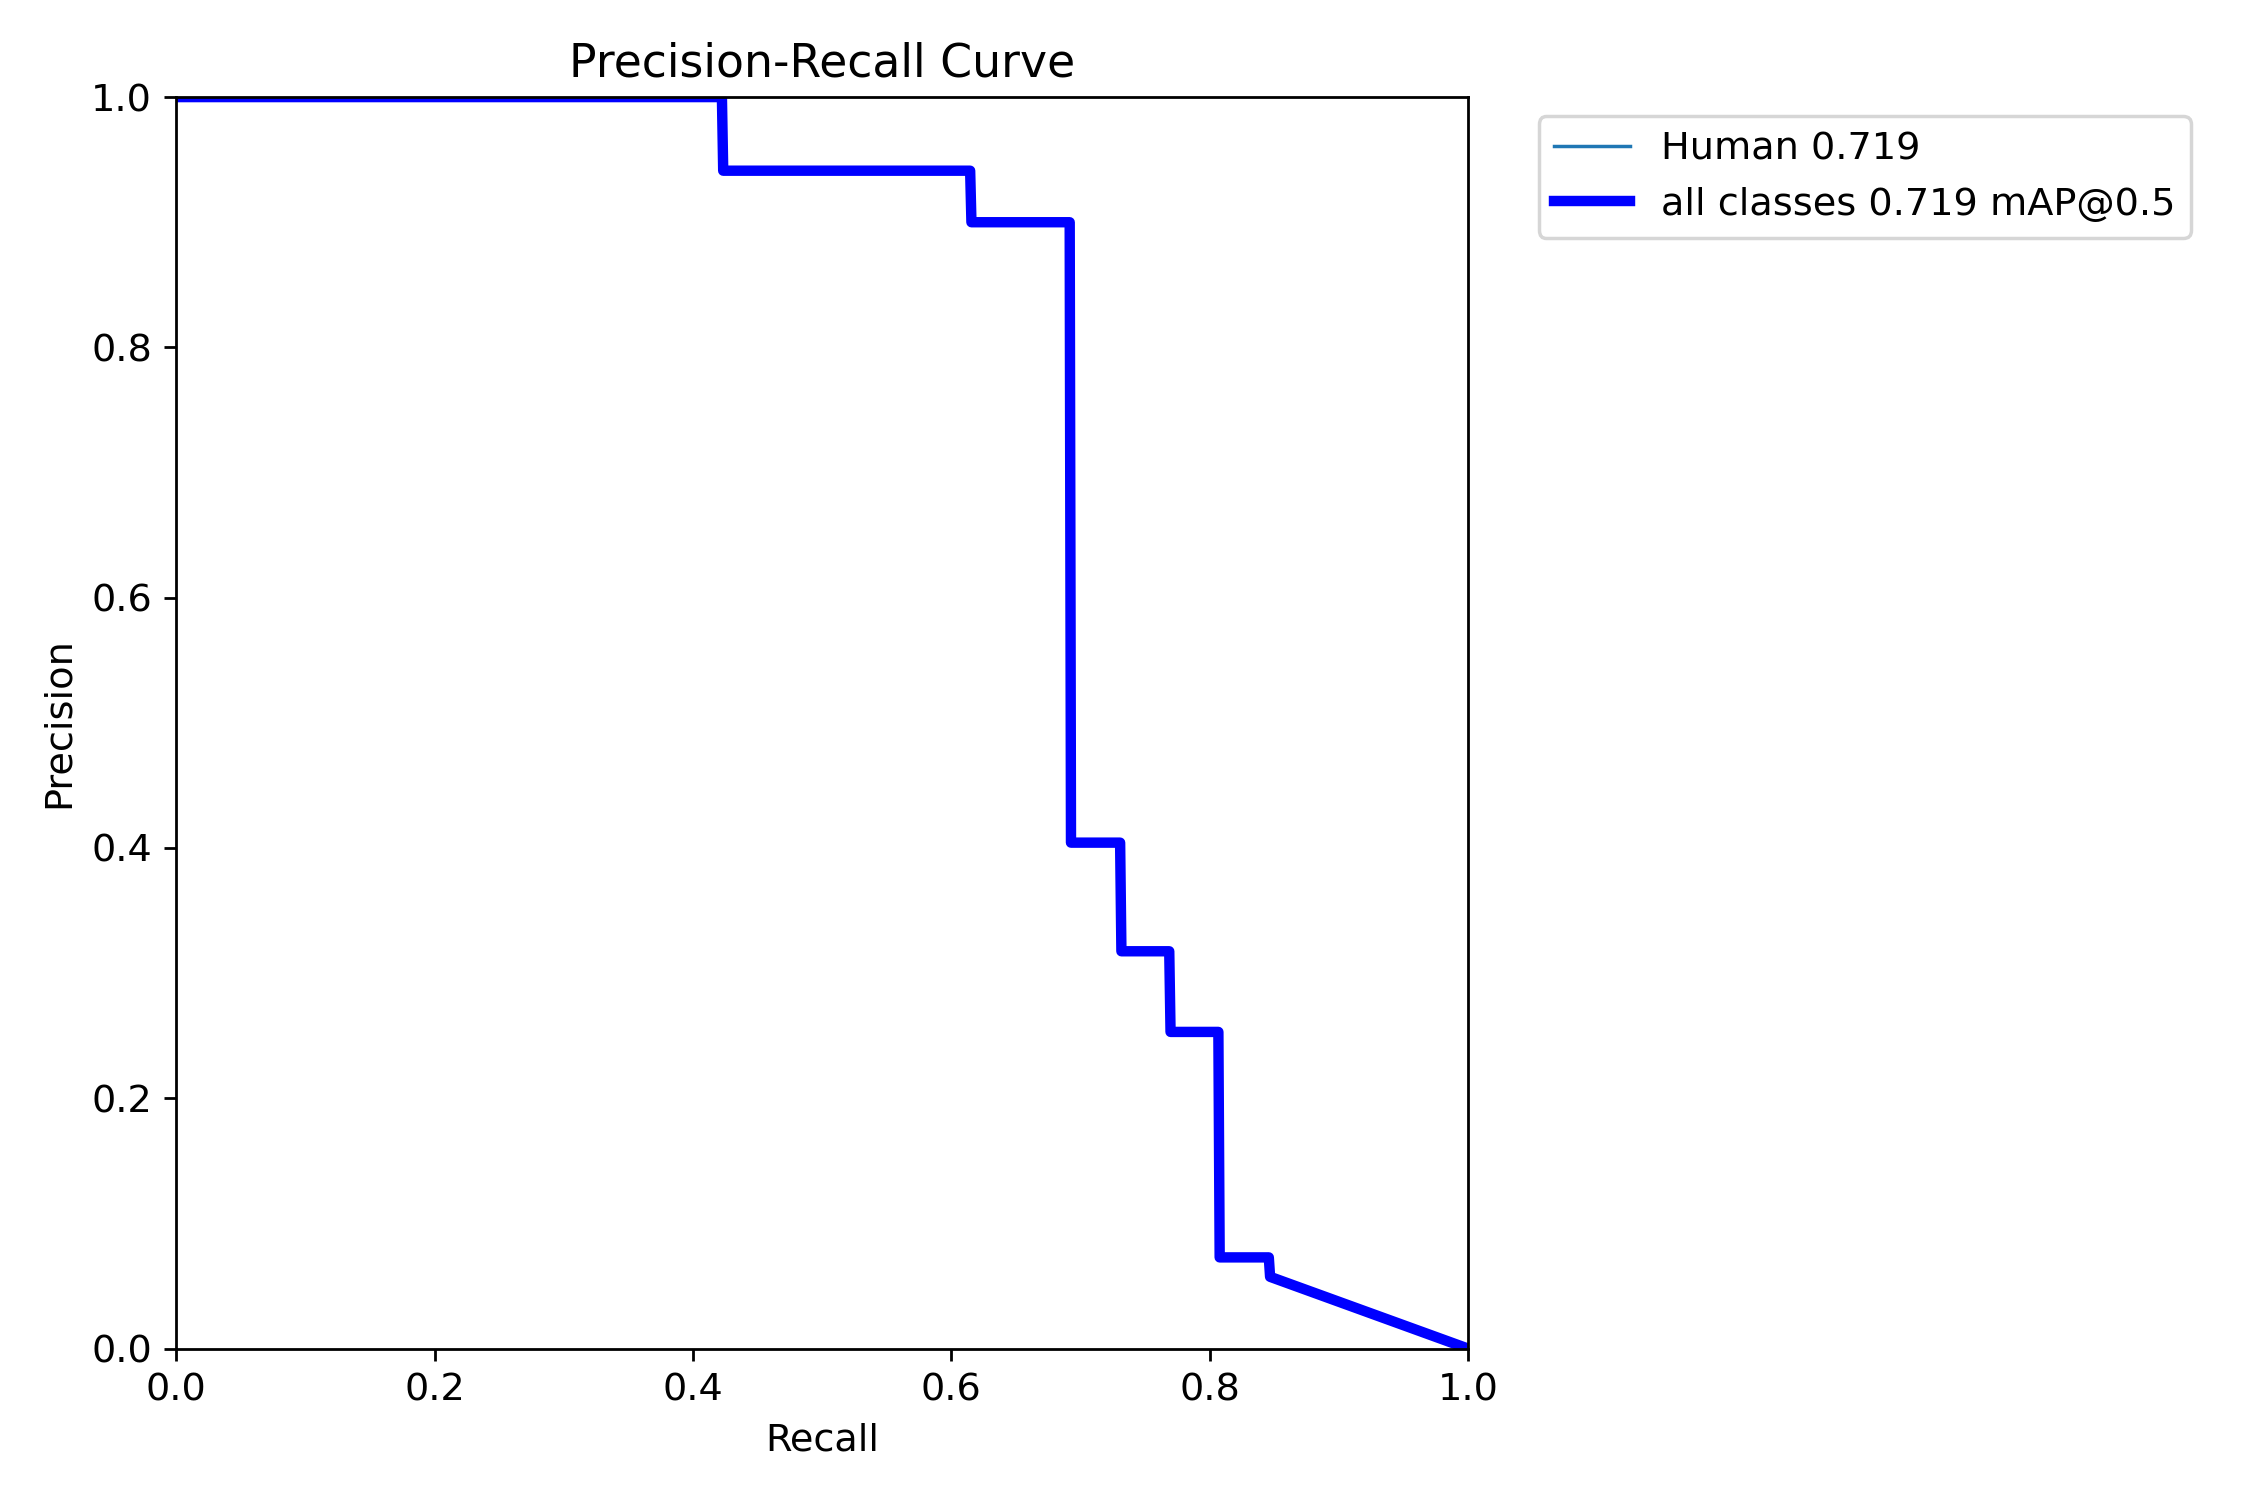

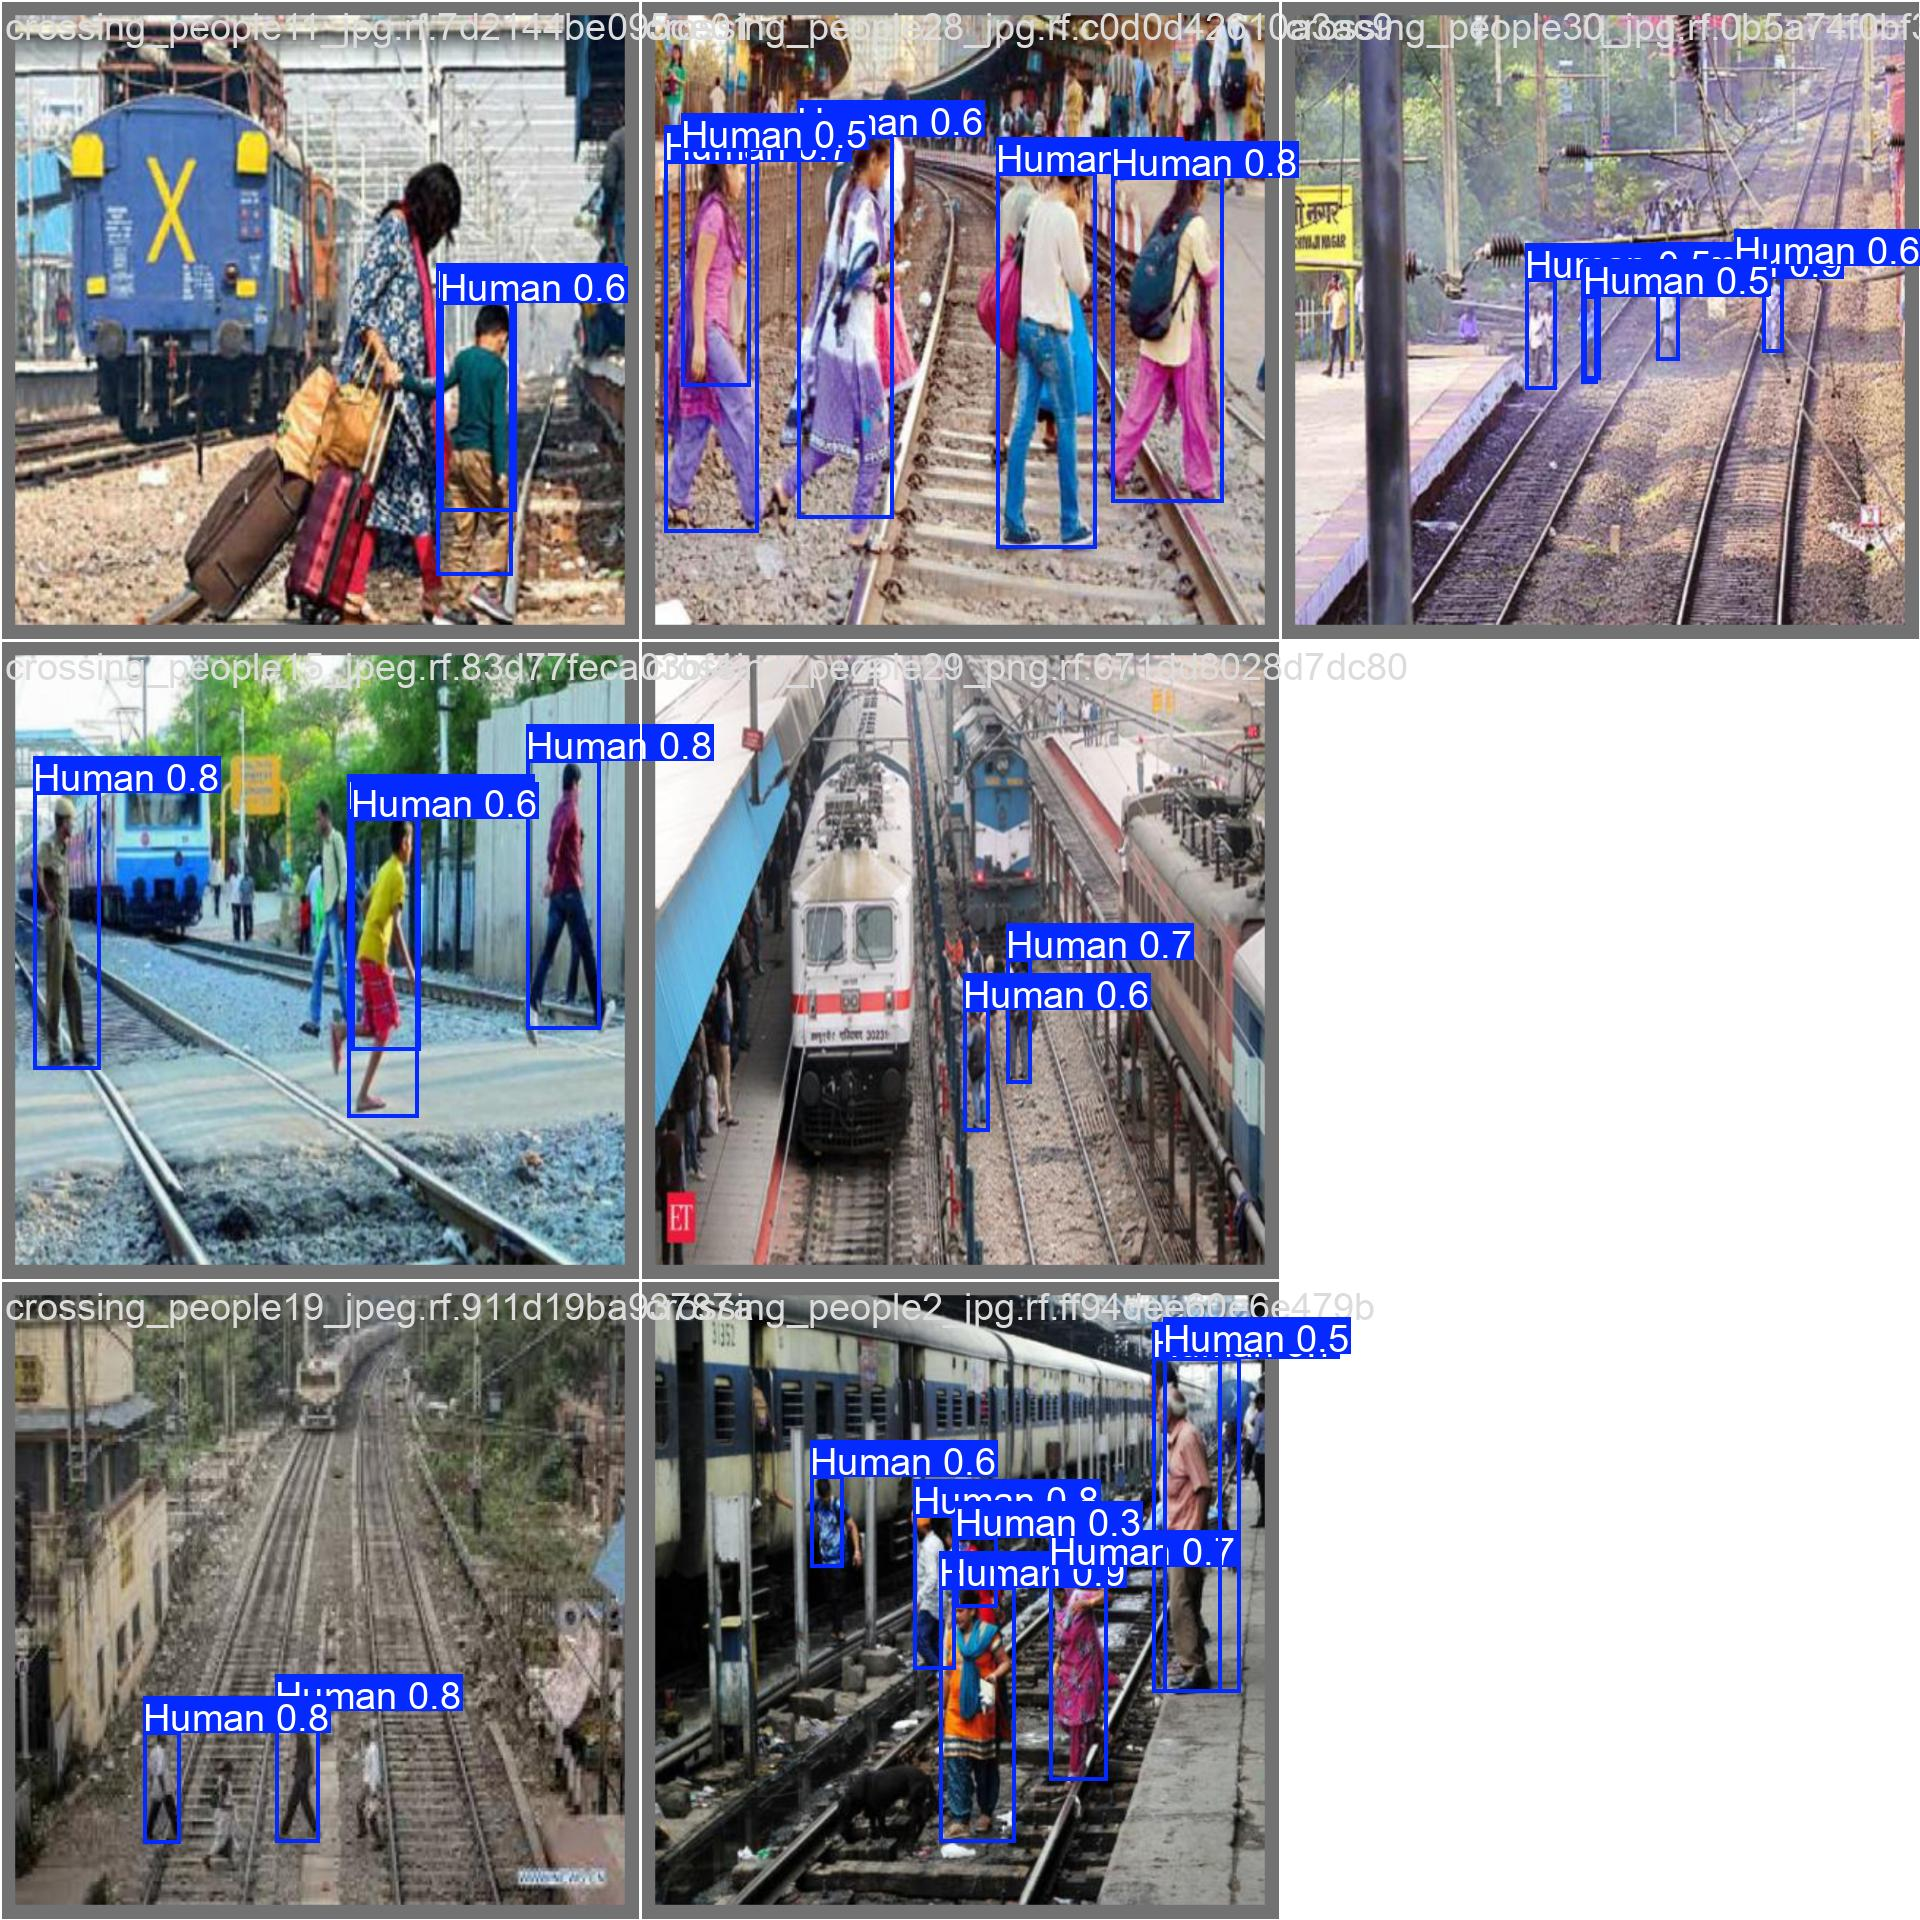

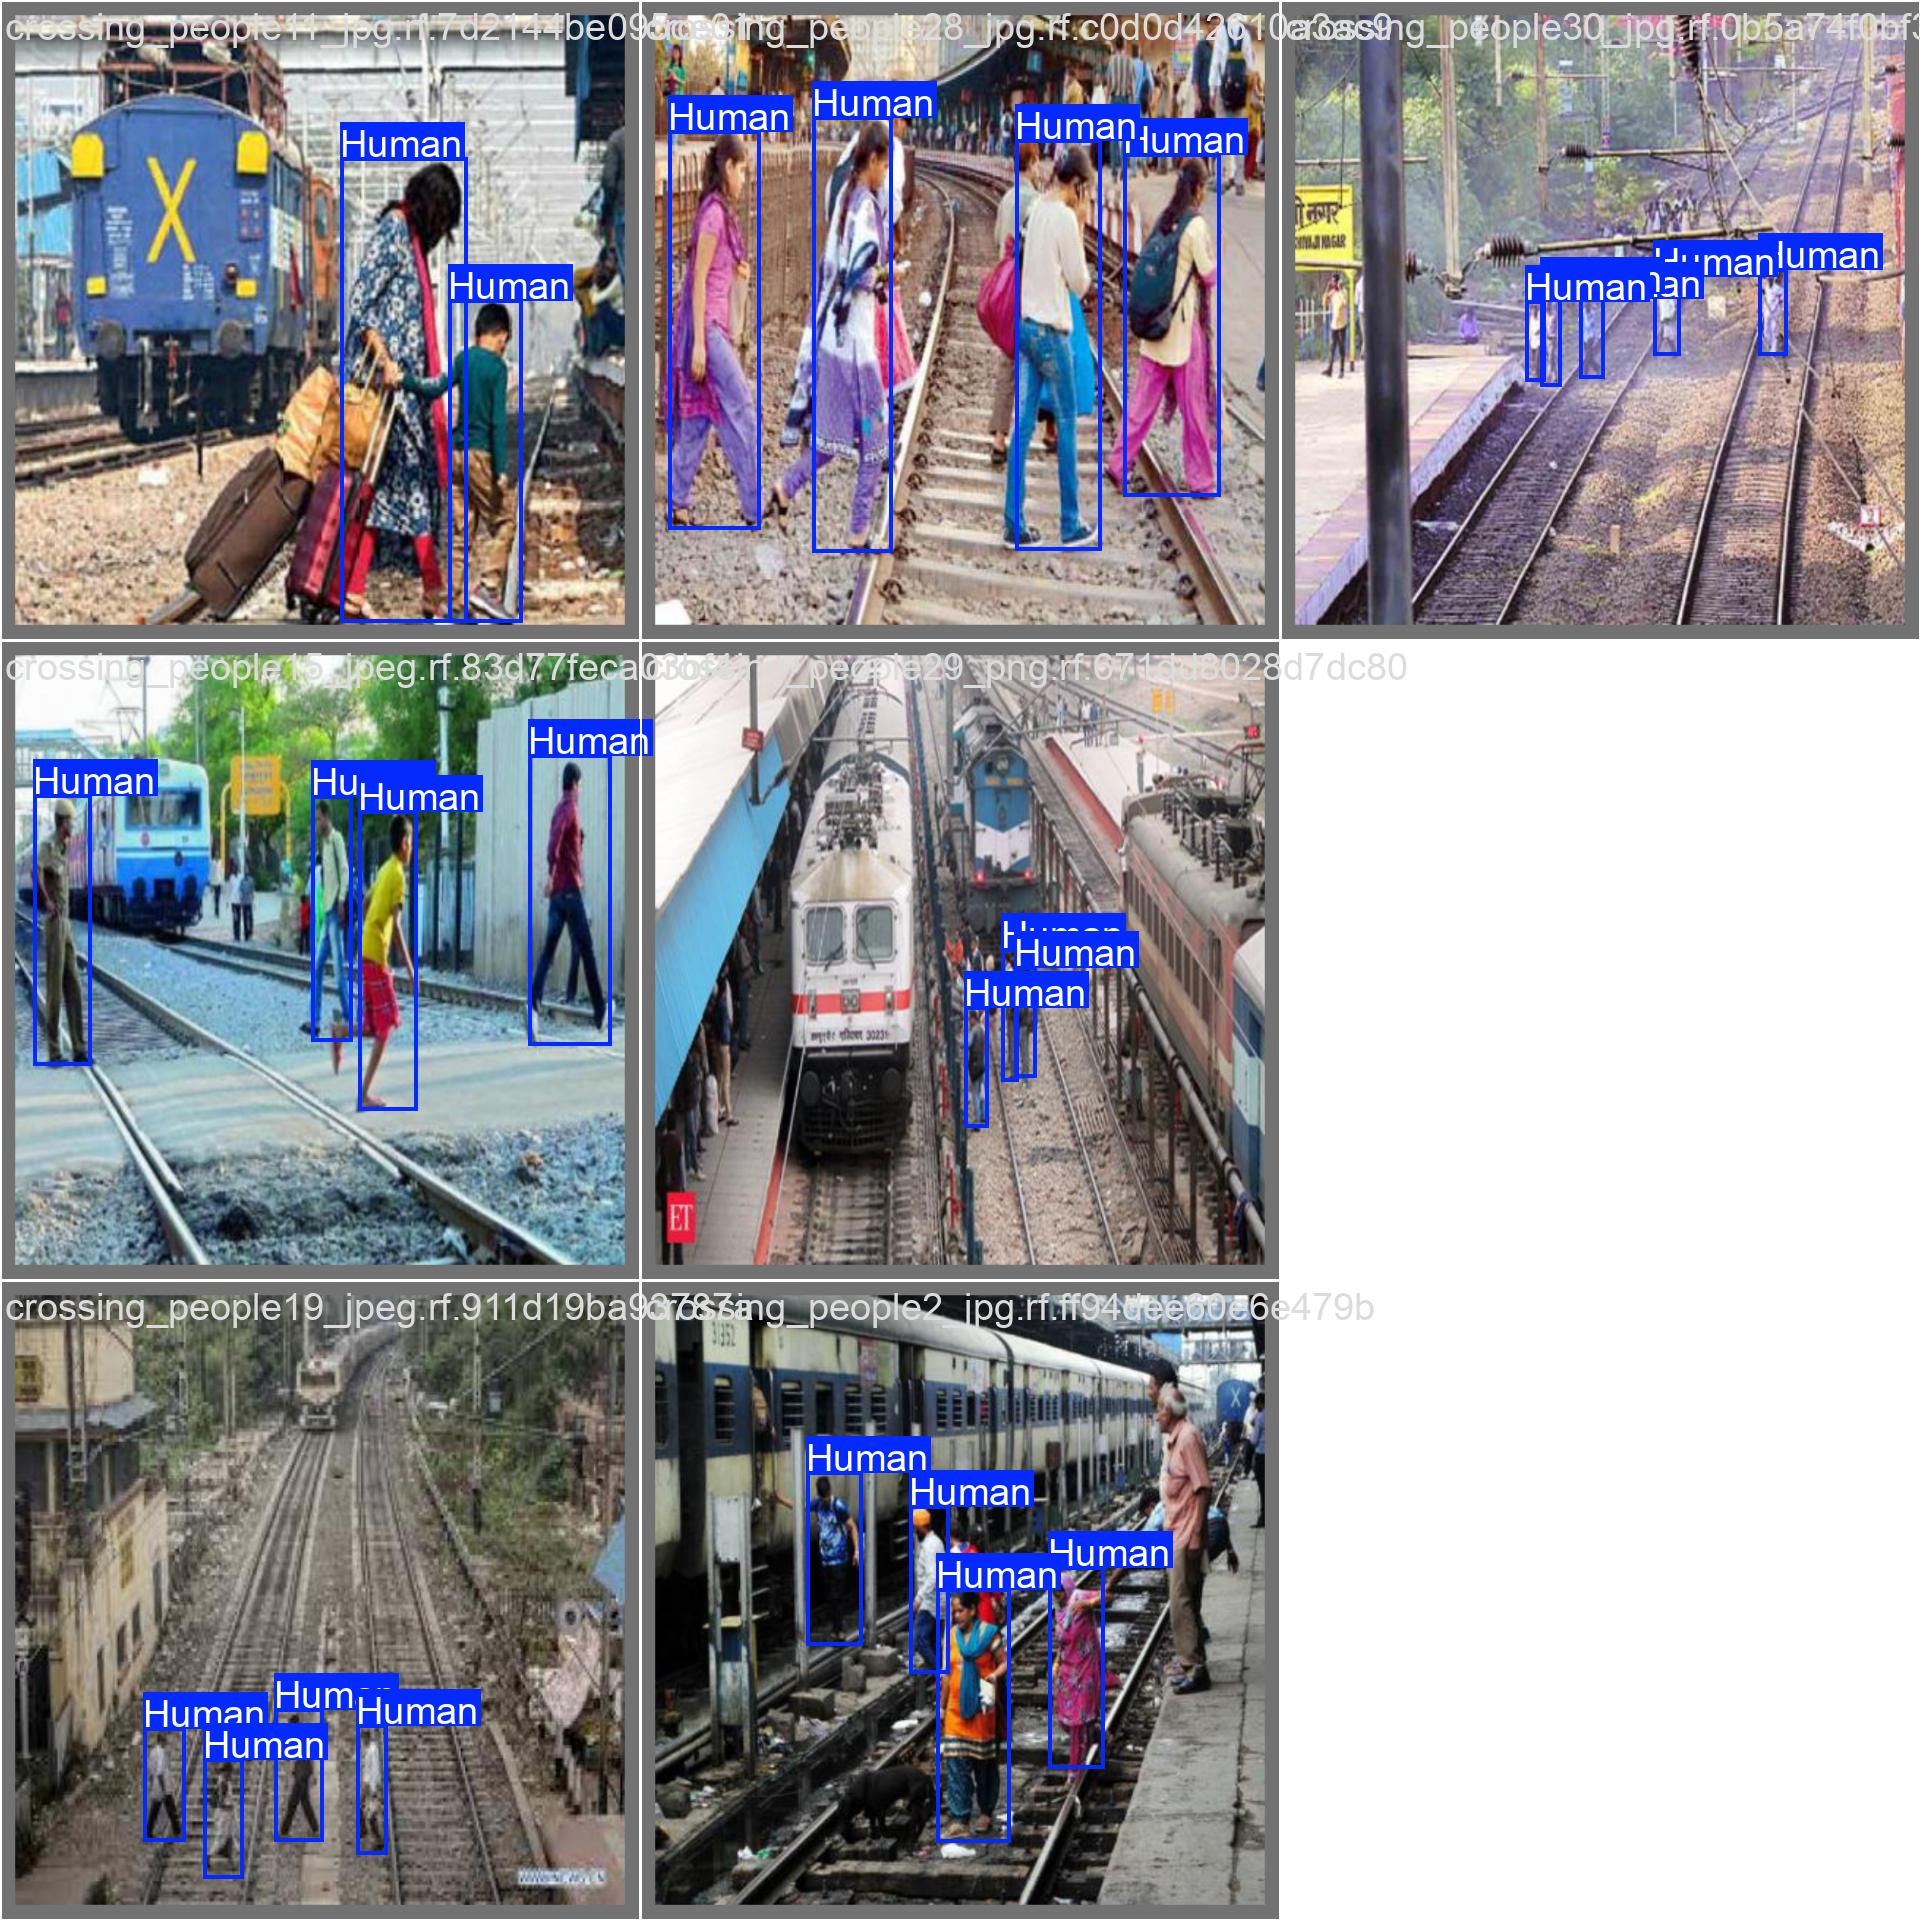

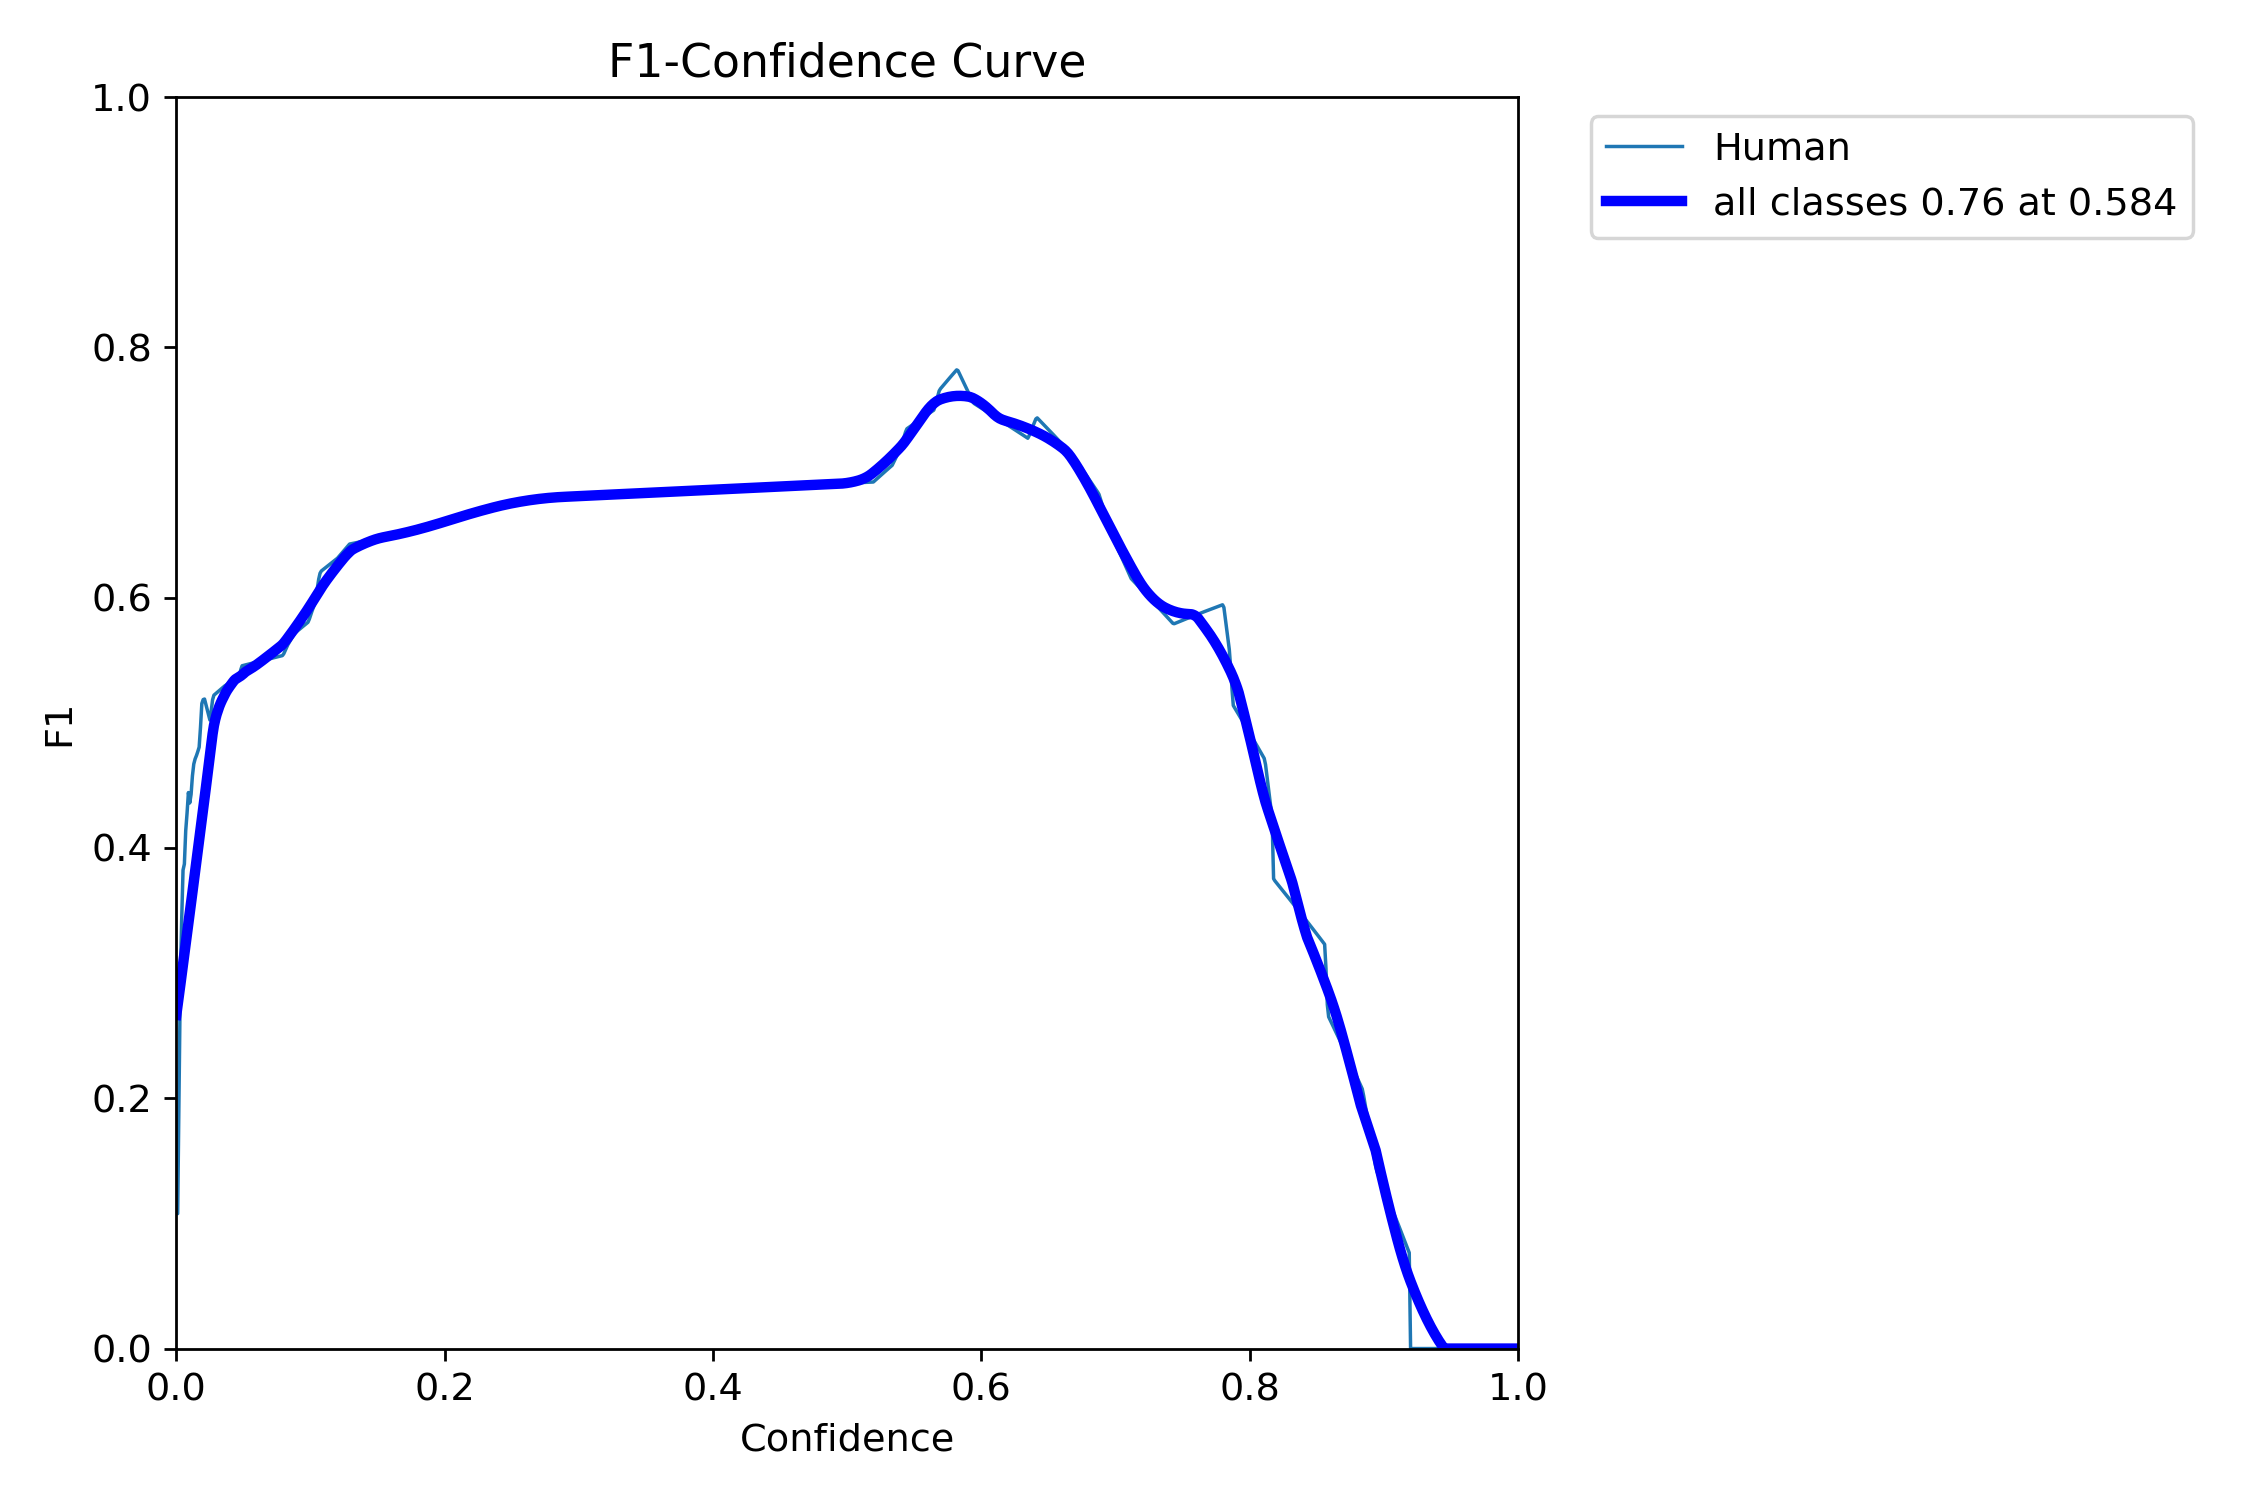

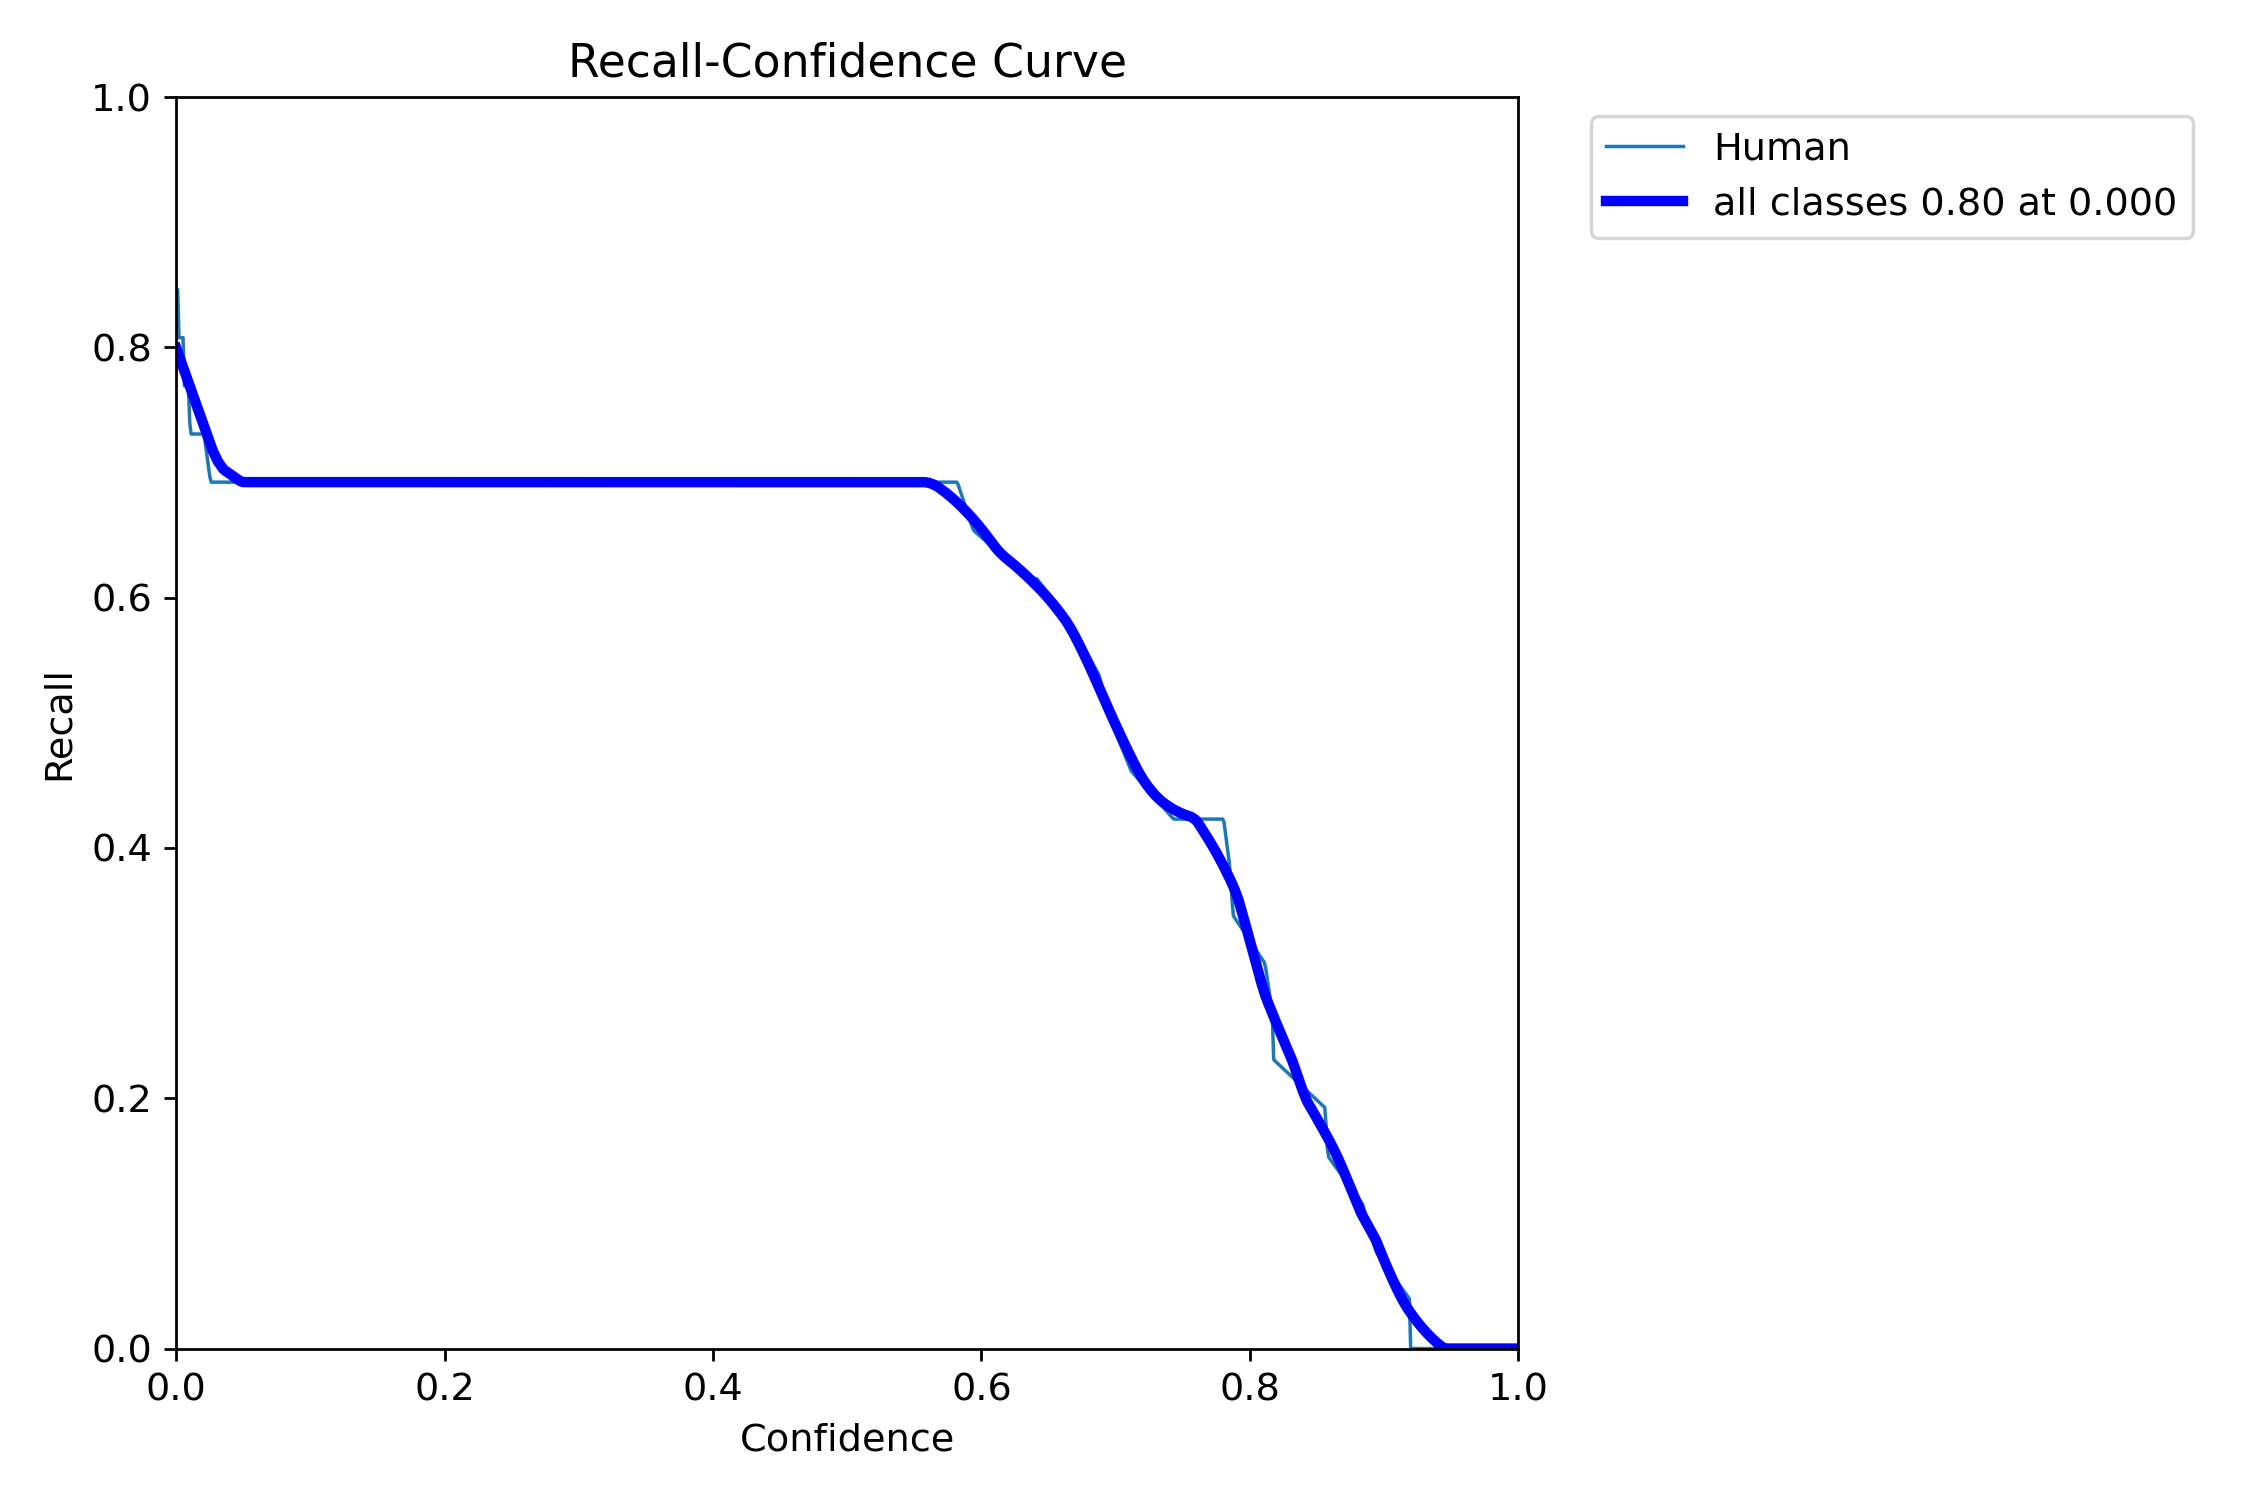

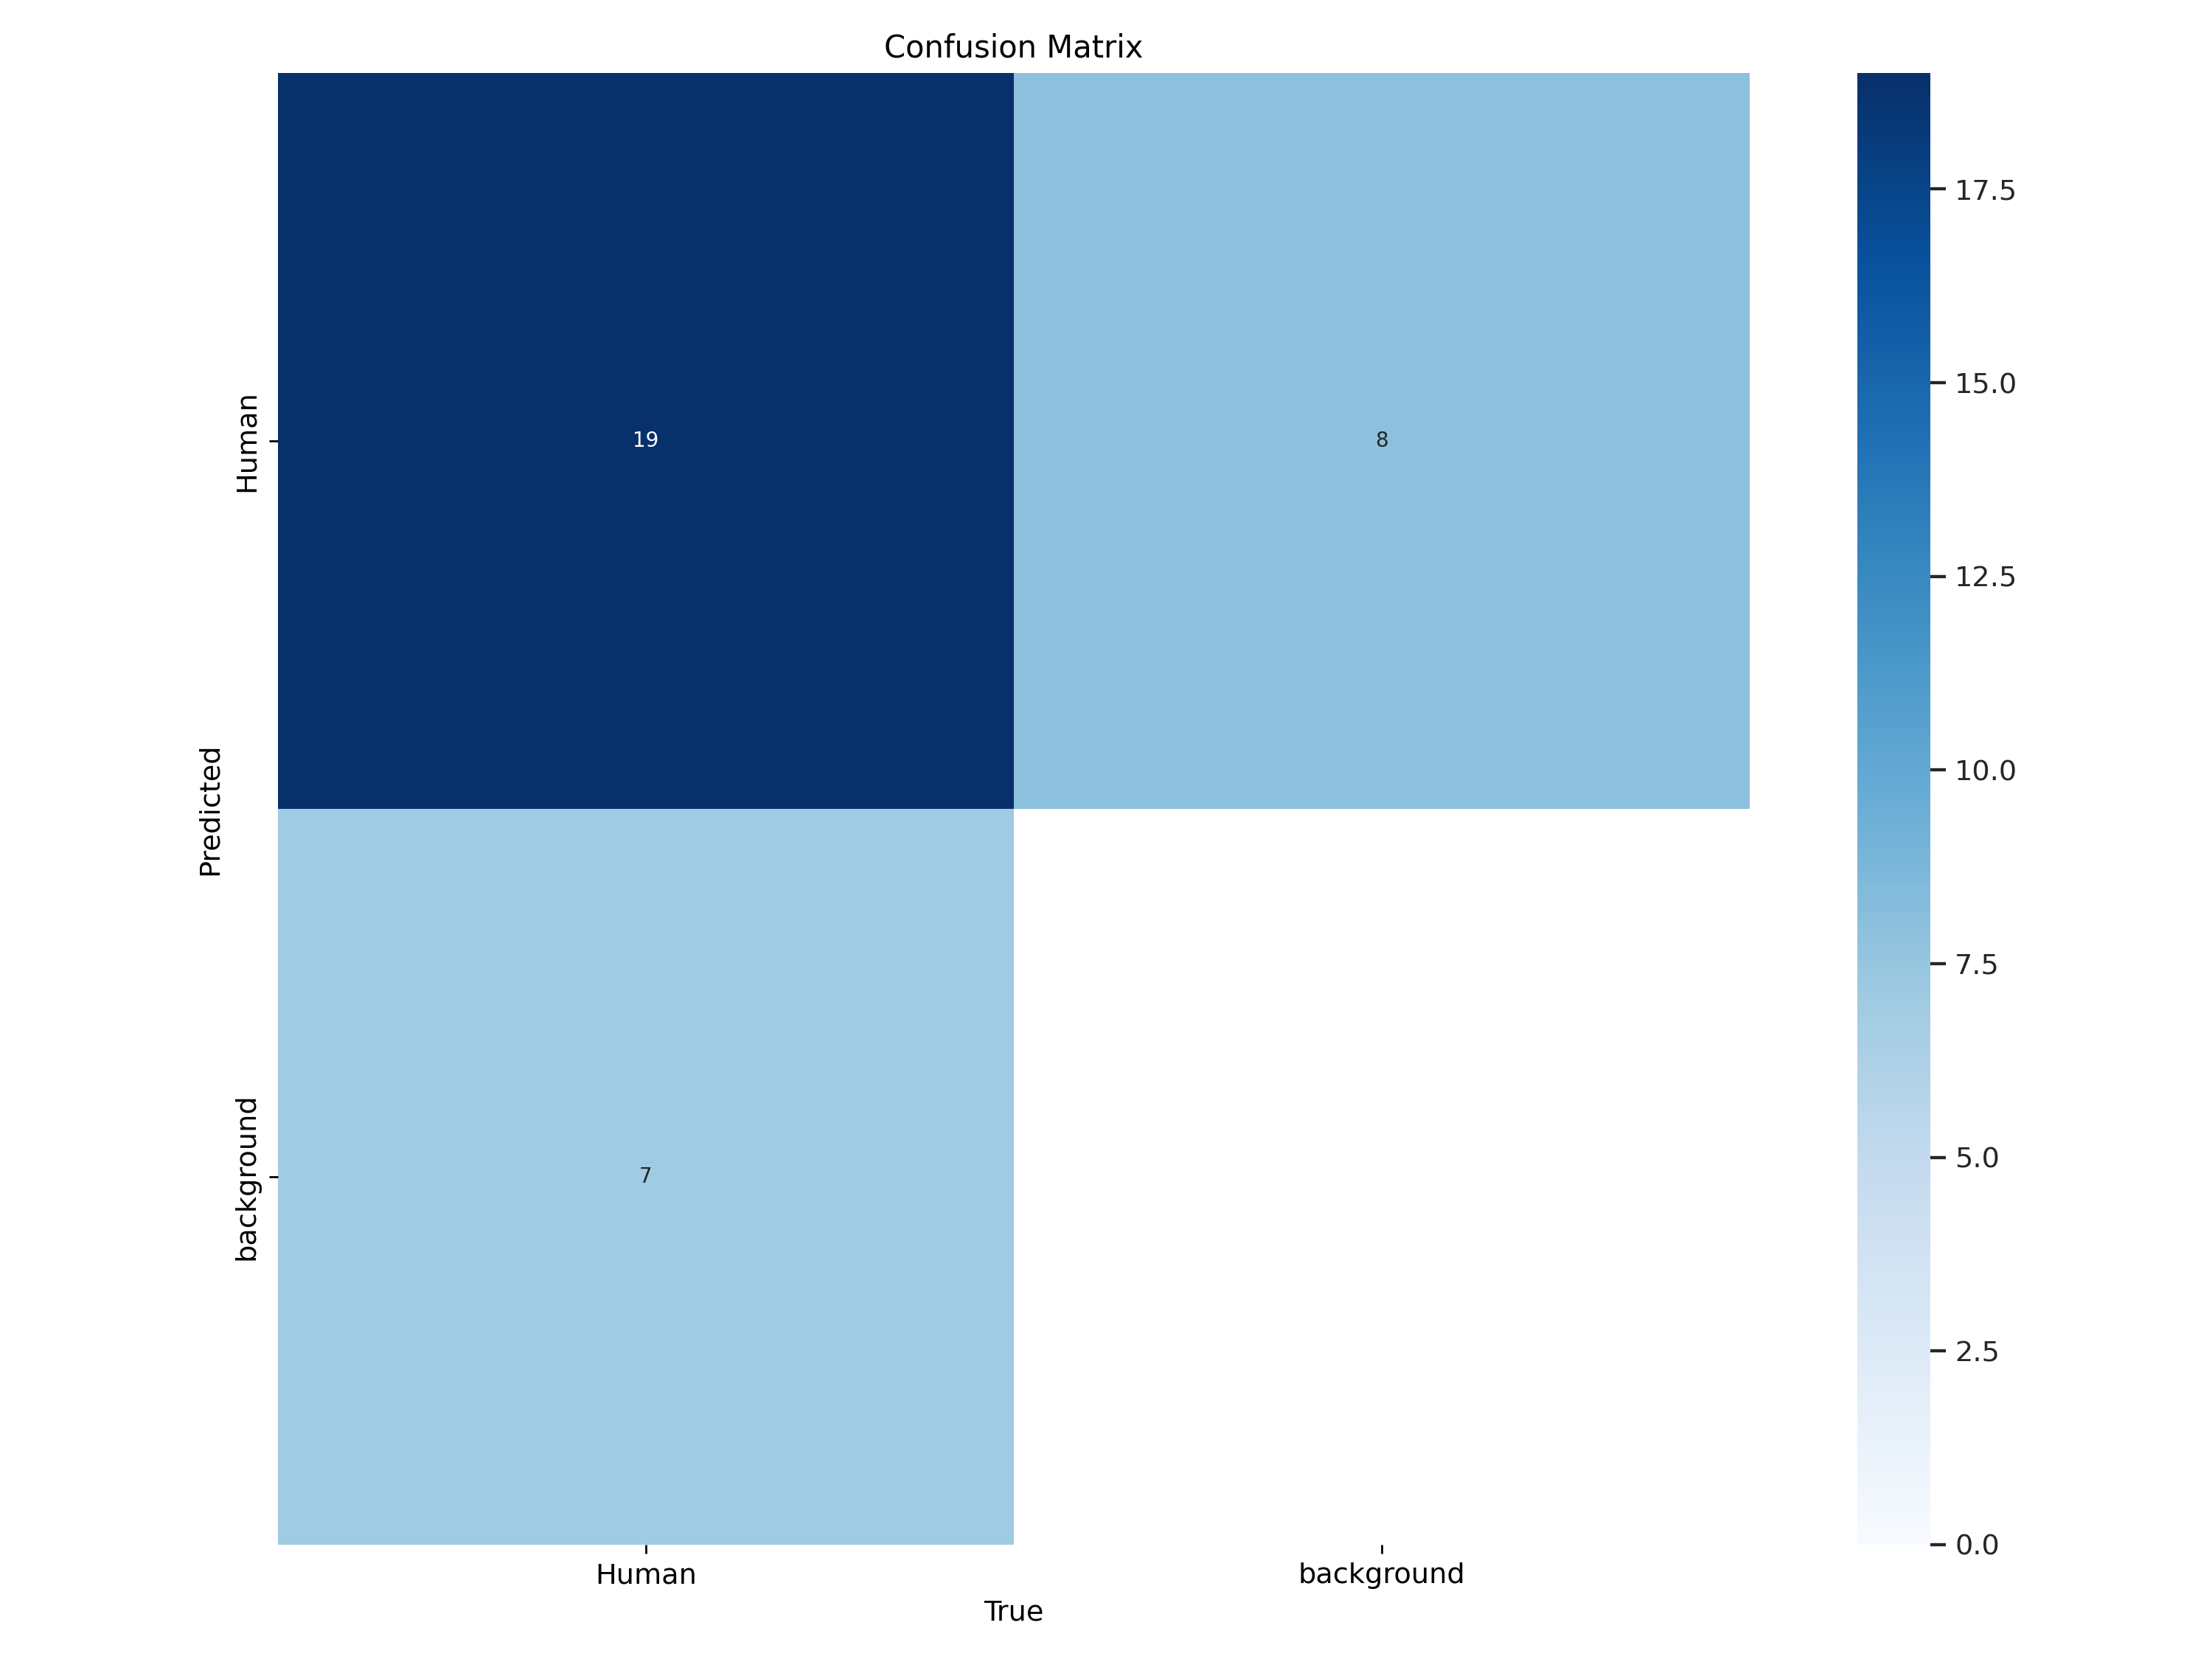

In [ ]:
predictions_folder = os.path.join(HOME, 'runs', 'detect', 'train2')

# Step 6: Display the saved prediction images
for image_file in os.listdir(predictions_folder):
    if image_file.endswith(".jpg") or image_file.endswith(".png"):
        display(Image(filename=os.path.join(predictions_folder, image_file)))

Metrics not found in the results. Check the output of model.predict()
